In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading the Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

print("Original shape:", df.shape)
display(df.head())

Original shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print("\nMissing values:\n", df.isnull().sum())

df.info()


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null

In [4]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# One-Hot Encoding for better working with non-tree models
X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Encoded feature matrix shape: {X.shape}")
print(f"Scaled feature matrix shape: {X_scaled.shape}")
print(f"Target vector shape: {y.shape}")

Encoded feature matrix shape: (41188, 53)
Scaled feature matrix shape: (41188, 53)
Target vector shape: (41188,)


In [5]:
# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training set shape: (28831, 53)
Test set shape: (12357, 53)
Training labels shape: (28831,)
Test labels shape: (12357,)


In [6]:
# Definig evaluation function
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f" Model: {name}")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve and AUC
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print("AUC Score:", round(auc, 4))
        RocCurveDisplay.from_predictions(y_true, y_proba)
        plt.title(f"{name} - ROC Curve")
        plt.show()

 Model: Logistic Regression
Accuracy : 0.9121
Precision: 0.6751
Recall   : 0.4239
F1 Score : 0.5207

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.68      0.42      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



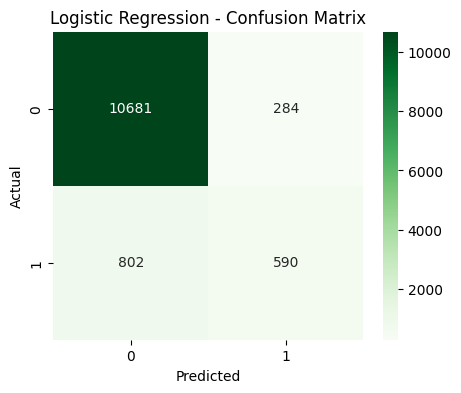

AUC Score: 0.9383


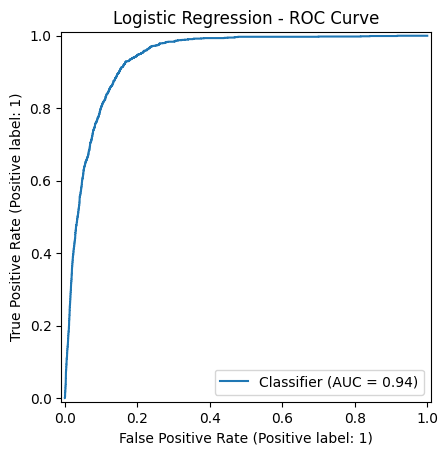

In [7]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr)

 Model: Naive Bayes
Accuracy : 0.7569
Precision: 0.2924
Recall   : 0.8154
F1 Score : 0.4304

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     10965
           1       0.29      0.82      0.43      1392

    accuracy                           0.76     12357
   macro avg       0.63      0.78      0.64     12357
weighted avg       0.89      0.76      0.80     12357



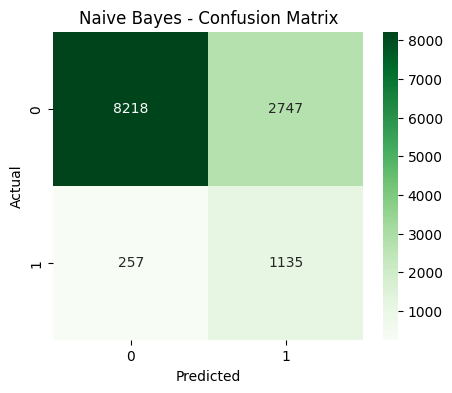

AUC Score: 0.8454


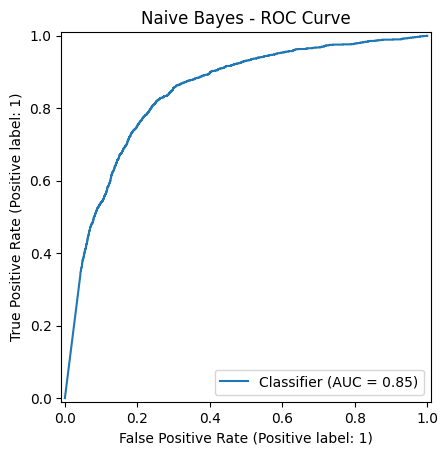

In [8]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_proba_nb)


 Model: K-Nearest Neighbors
Accuracy : 0.9011
Precision: 0.6146
Recall   : 0.3276
F1 Score : 0.4274

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10965
           1       0.61      0.33      0.43      1392

    accuracy                           0.90     12357
   macro avg       0.77      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357



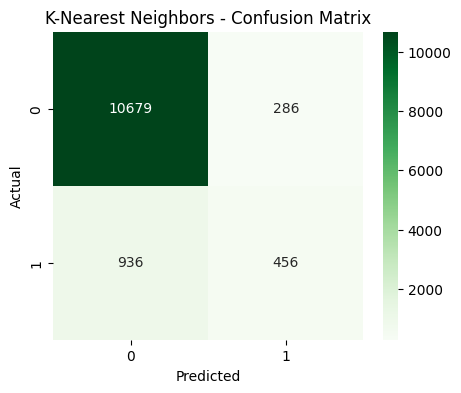

AUC Score: 0.8189


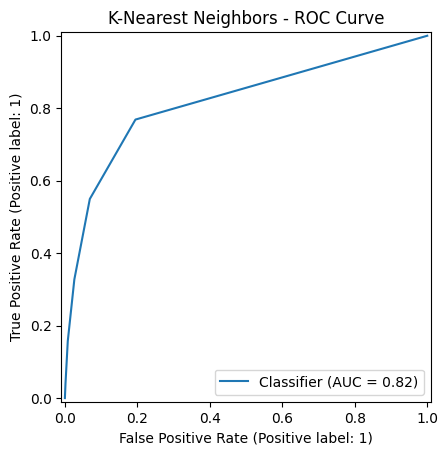

In [9]:
# K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn, y_proba_knn)


 Model: Decision Tree
Accuracy : 0.8898
Precision: 0.5104
Recall   : 0.5266
F1 Score : 0.5184

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.51      0.53      0.52      1392

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



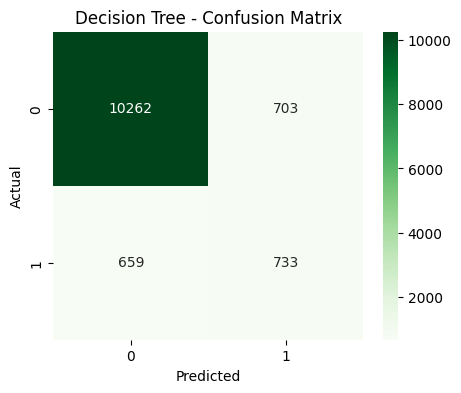

AUC Score: 0.7312


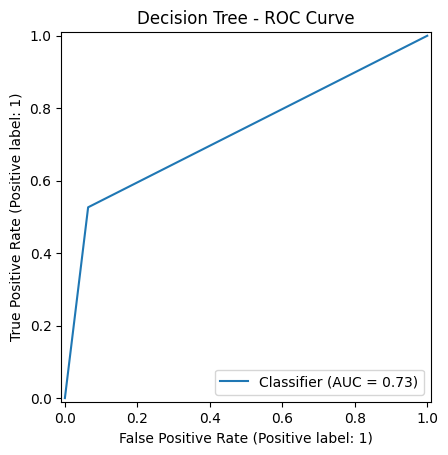

In [10]:
# Decision Tree

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)


 Model: Random Forest
Accuracy : 0.9158
Precision: 0.675
Recall   : 0.4864
F1 Score : 0.5653

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.49      0.57      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.73      0.76     12357
weighted avg       0.91      0.92      0.91     12357



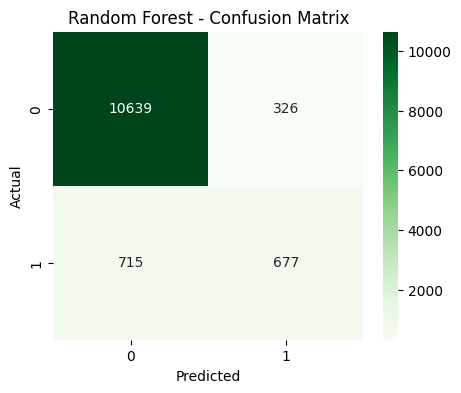

AUC Score: 0.944


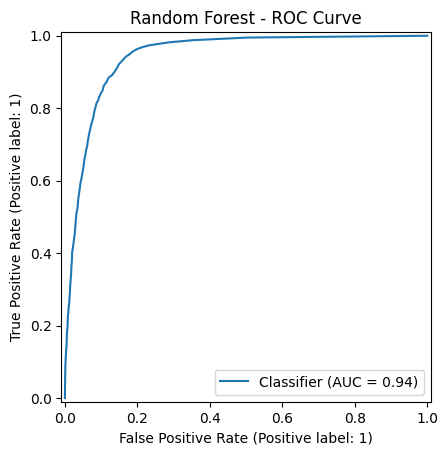

In [11]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)


 Model: XGBoost
Accuracy : 0.9141
Precision: 0.6383
Recall   : 0.5489
F1 Score : 0.5902

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.55      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



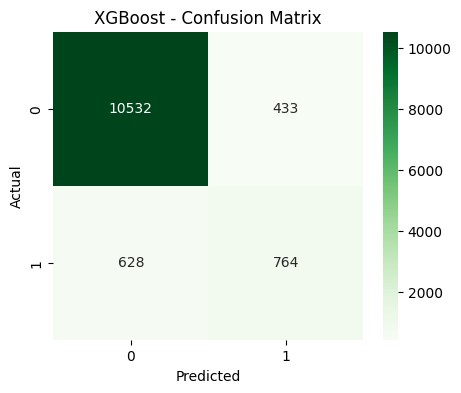

AUC Score: 0.9453


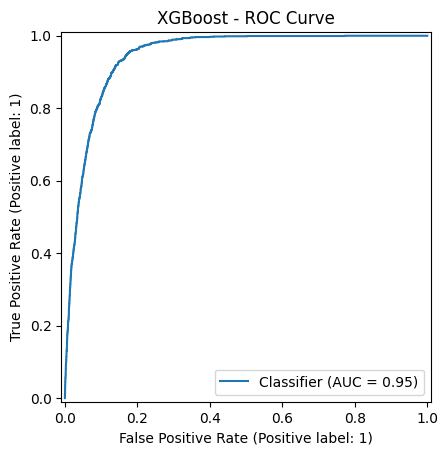

In [12]:
# XGBoost Algorithm

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb)


In [13]:
# 4: Model Performance Summary Table

results = {
    "Model": ["Logistic Regression", "Naive Bayes", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_nb),
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
}

summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
summary_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.914138,0.638262,0.548851,0.590189,0.945258
1,Random Forest,0.915756,0.674975,0.486351,0.565344,0.943977
2,Logistic Regression,0.912115,0.675057,0.423851,0.520741,0.938280
3,Decision Tree,0.889779,0.510446,0.526580,0.518388,0.731234
4,Naive Bayes,0.756899,0.292375,0.815374,0.430413,0.845430
5,KNN,0.901109,0.614555,0.327586,0.427366,0.818937


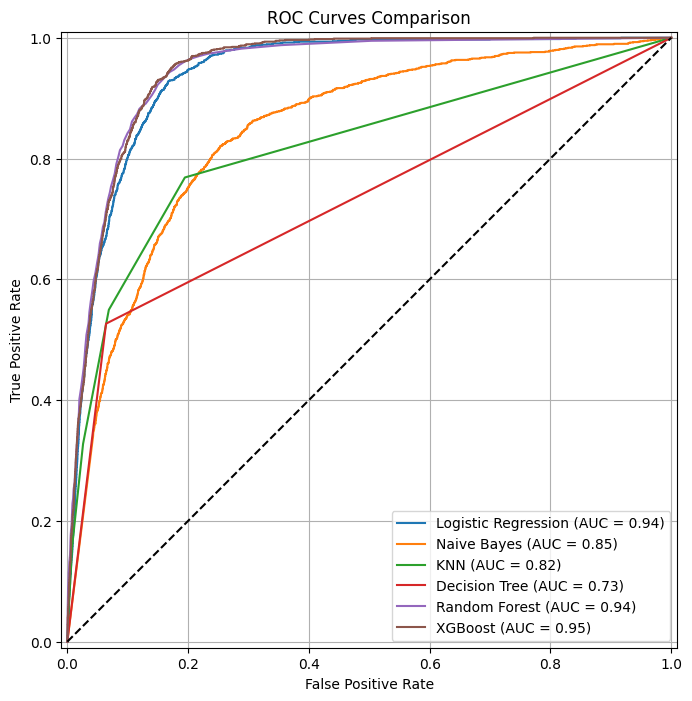

In [14]:
# ROC Curve Comparison
plt.figure(figsize=(10, 8))

RocCurveDisplay.from_predictions(y_test, y_proba_lr, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_nb, name="Naive Bayes", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_knn, name="KNN", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_dt, name="Decision Tree", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_rf, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba_xgb, name="XGBoost", ax=plt.gca())

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


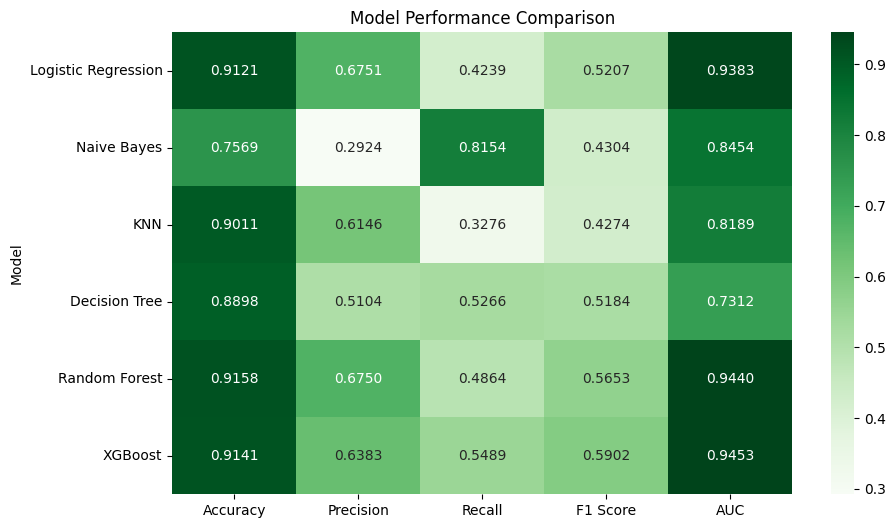

In [15]:
# Creating a DataFrame of metrics
metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_nb),
        roc_auc_score(y_test, y_proba_knn),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_xgb)
    ]
})

metrics.set_index("Model", inplace=True)

# Plotting combined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics, annot=True, fmt=".4f", cmap="Greens")
plt.title("Model Performance Comparison")
plt.show()

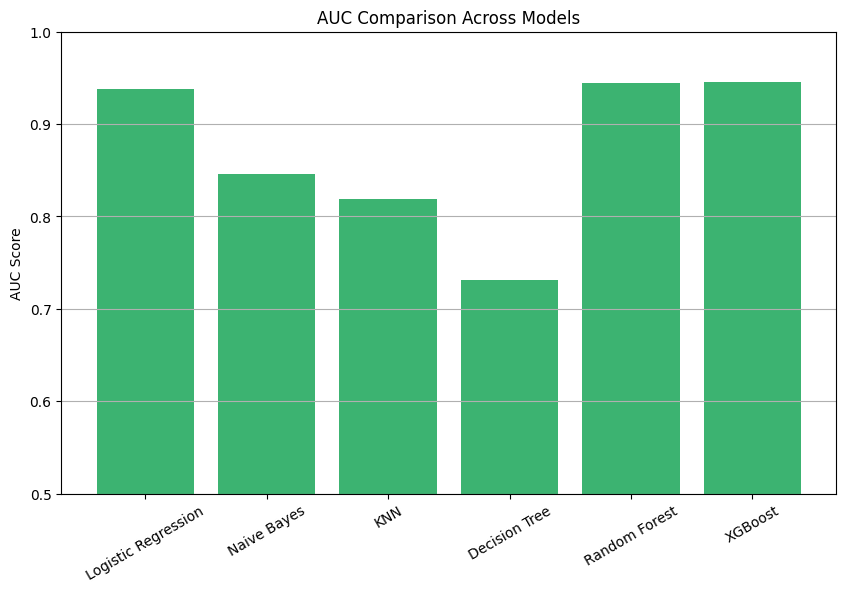

In [16]:
# AUC Comparison using Bar chart

auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, y_proba_lr),
    "Naive Bayes": roc_auc_score(y_test, y_proba_nb),
    "KNN": roc_auc_score(y_test, y_proba_knn),
    "Decision Tree": roc_auc_score(y_test, y_proba_dt),
    "Random Forest": roc_auc_score(y_test, y_proba_rf),
    "XGBoost": roc_auc_score(y_test, y_proba_xgb)
}

plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color='mediumseagreen')
plt.ylabel("AUC Score")
plt.title("AUC Comparison Across Models")
plt.xticks(rotation=30)
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.show()


Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Model: Random Forest (Tuned)
Accuracy : 0.9139
Precision: 0.667
Recall   : 0.4705
F1 Score : 0.5518

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.47      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



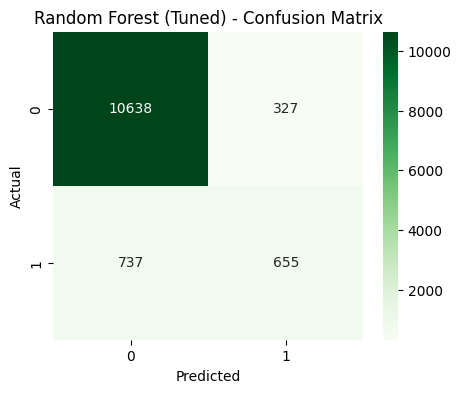

AUC Score: 0.9429


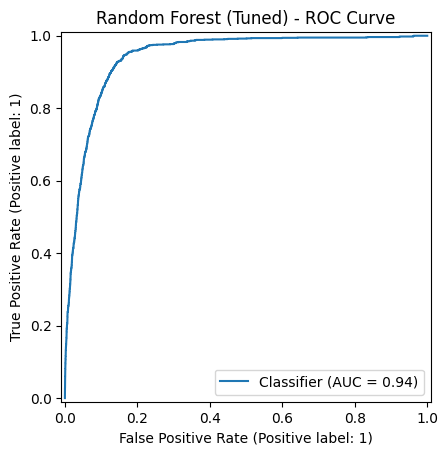

In [17]:
# Tuning Hyperparameters Random Forest
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1', n_jobs=-1)

# Fit the model
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)

# Predict
y_pred_rf_tuned = best_rf.predict(X_test)
y_proba_rf_tuned = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Random Forest (Tuned)", y_test, y_pred_rf_tuned, y_proba_rf_tuned)


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
 Model: XGBoost (Tuned)
Accuracy : 0.9183
Precision: 0.6652
Recall   : 0.5539
F1 Score : 0.6045

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.67      0.55      0.60      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.92     12357



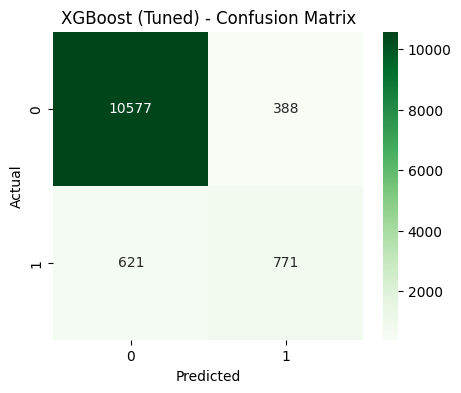

AUC Score: 0.9504


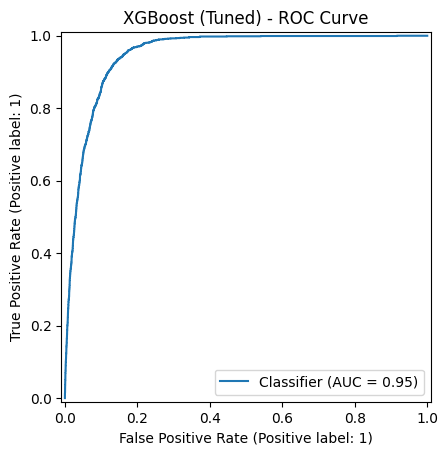

In [18]:
# Tuning Hyperparameters XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), xgb_params, cv=3, scoring='f1', n_jobs=-1)

# Fit the model
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
print("Best XGB Params:", grid_xgb.best_params_)

# Predict
y_pred_xgb_tuned = best_xgb.predict(X_test)
y_proba_xgb_tuned = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("XGBoost (Tuned)", y_test, y_pred_xgb_tuned, y_proba_xgb_tuned)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
 Model: Logistic Regression (Tuned)
Accuracy : 0.9122
Precision: 0.6742
Recall   : 0.4267
F1 Score : 0.5227

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.43      0.52      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357



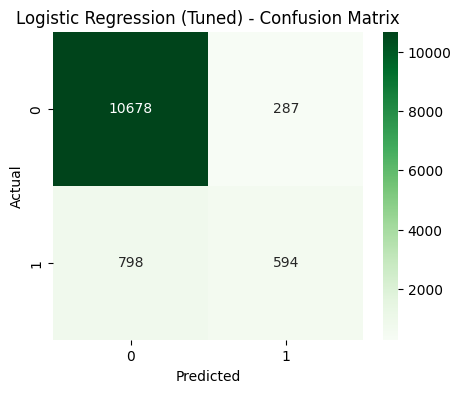

AUC Score: 0.9385


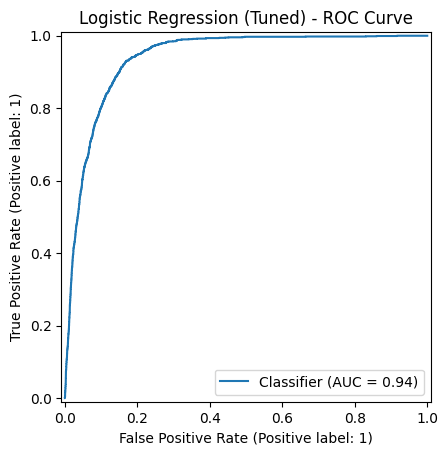

In [19]:
# Tuning Hyperparameters Logistic Regression

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=3, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
lr_grid.fit(X_train, y_train)

# Now access the best estimator and evaluate
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

# Predict
y_pred_lr_tuned = best_lr.predict(X_test)
y_proba_lr_tuned = best_lr.predict_proba(X_test)[:, 1]

# Evaluate
evaluate_model("Logistic Regression (Tuned)", y_test, y_pred_lr_tuned, y_proba_lr_tuned)



In [20]:
# Comparison dictionary
comparison_results = {
    "Model": [
        "Logistic Regression", "Logistic Regression (Tuned)",
        "Random Forest", "Random Forest (Tuned)",
        "XGBoost", "XGBoost (Tuned)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_rf_tuned),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_xgb_tuned)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf_tuned),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb_tuned)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf_tuned),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb_tuned)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf_tuned),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_xgb_tuned)
    ],
    "AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_lr_tuned),
        roc_auc_score(y_test, y_proba_rf),
        roc_auc_score(y_test, y_proba_rf_tuned),
        roc_auc_score(y_test, y_proba_xgb),
        roc_auc_score(y_test, y_proba_xgb_tuned)
    ]
}

# Create DataFrame
tuning_comparison_df = pd.DataFrame(comparison_results)
tuning_comparison_df = tuning_comparison_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

# Display
display(tuning_comparison_df)


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost (Tuned),0.918346,0.665229,0.553879,0.604469,0.950371
1,XGBoost,0.914138,0.638262,0.548851,0.590189,0.945258
2,Random Forest,0.915756,0.674975,0.486351,0.565344,0.943977
3,Random Forest (Tuned),0.913895,0.667006,0.470546,0.551811,0.942927
4,Logistic Regression (Tuned),0.912196,0.674234,0.426724,0.522657,0.938492
5,Logistic Regression,0.912115,0.675057,0.423851,0.520741,0.938280
